## Esercizio 1 - Operazioni su array NumPy
Crea un vettore NumPy con i seguenti prezzi mensili di abbonamento (in euro) per 5 servizi streaming: 15, 12, 9, 20, 18

Calcola la spesa totale mensile per sottoscrivere tutti i servizi.

Il servizio da 20 € aumenta il prezzo del 15%:

Modifica il vettore per applicare l'aumento

Il servizio da 9 € ottiene uno sconto del 20%:

Applica la modifica

Gli altri servizi (15 €, 12 €, 18 €) subiscono un aumento del 8%:

Aggiorna il vettore

Calcola la nuova spesa totale mensile

Calcola quanto ha inciso l'aumento del servizio più costoso sulla spesa complessiva:

Confronta la spesa totale iniziale con quella dopo il solo aumento del servizio a 20 €

In [18]:
import numpy as np

prezzi = np.array([15,12,9,20,18], dtype=float)
somma = prezzi.sum()

prezzi[3] += prezzi[3] * 0.2
prezzi
somma2 = prezzi.sum()

prezzi[2] += (-prezzi[2] * 0.2)
prezzi

prezzi[[0,1,4]] += prezzi[[0,1,4]] * 0.08
prezzi
somma1 = prezzi.sum()

(somma2 - somma) /somma *100


np.float64(5.405405405405405)

## Esercizio 2 - Analisi di un processo aleatorio
Considera un processo di lancio di monete:

Ogni lancio può risultare "Testa" (+1) o "Croce" (0) con uguale probabilità

Un giocatore parte con un saldo iniziale di 10 €

A ogni lancio, se esce "Testa" vince 1 €, se esce "Croce" perde 1 €

Scrivi una funzione simula_lanci(n_lanci, n_simulazioni) che simula il processo per n_lanci lanci e n_simulazioni simulazioni

Restituisce tre array:

Saldo medio dopo ogni lancio

Deviazione standard del saldo dopo ogni lancio

Array con il saldo finale di ogni simulazione

Esegui la simulazione con 500 lanci e 1000 simulazioni

Crea un grafico che mostra:

L'andamento del saldo medio nel tempo

Una banda che indica ±1 deviazione standard

Calcola la probabilità di finire in positivo dopo 500 lanci

Calcola il saldo massimo e minimo osservato nelle simulazioni

0.471
78.0
-58.0


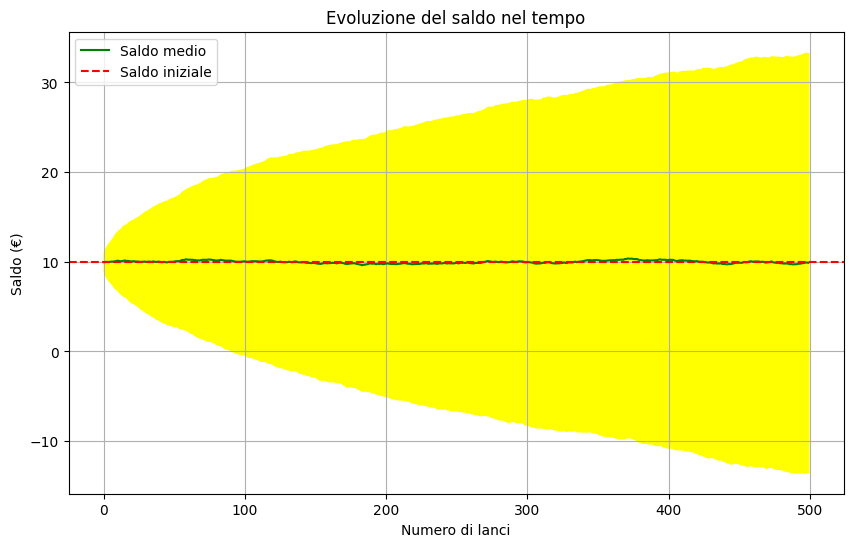

In [88]:
import numpy as np
import matplotlib.pyplot as plt

def simula_lanci(n_lanci, n_simulazioni, saldo_iniziale=10):
    
    saldo_medio = np.zeros(n_lanci)
    saldo_std = np.zeros(n_lanci)
    saldi_finali = np.zeros(n_simulazioni)
    
    # Simulazioni
    for i in range(n_simulazioni):
        lanci = np.random.choice([1, -1], size=n_lanci)  # +1 per Testa, -1 per Croce
        saldo = saldo_iniziale + np.cumsum(lanci)
        saldi_finali[i] = saldo[-1]
        
        
        if i == 0:
            saldo_medio = saldo
        else:
            # Calcolo incrementale della media e varianza
            prev_media = saldo_medio
            saldo_medio = prev_media + (saldo - prev_media)/(i+1)
            
            # Calcolo incrementale della varianza
            if i == 1:
                M2 = (saldo - prev_media)**2
            else:
                M2 = M2 + (saldo - prev_media)*(saldo - saldo_medio)
    
    # Calcola deviazione standard
    saldo_std = np.sqrt(M2 / n_simulazioni)
    
    return saldo_medio, saldo_std, saldi_finali

# Parametri
n_lanci = 500
n_simulazioni = 1000

# Simulazione
saldo_medio, saldo_std, saldi_finali = simula_lanci(n_lanci, n_simulazioni)

# Punto 4
prob_positivo = np.sum(saldi_finali > 10) / n_simulazioni
print(prob_positivo)

# Punto 5
print(np.max(saldi_finali))
print(np.min(saldi_finali))

# Punto 3 - Grafico
plt.figure(figsize=(10, 6))
plt.plot(saldo_medio, label='Saldo medio', color='green' )
plt.fill_between(range(n_lanci), 
                 saldo_medio - saldo_std, 
                 saldo_medio + saldo_std, color='yellow')
plt.axhline(y=10, color='r', linestyle='--', label='Saldo iniziale')
plt.xlabel('Numero di lanci')
plt.ylabel('Saldo (€)')
plt.title('Evoluzione del saldo nel tempo')
plt.legend()
plt.grid(True)
plt.show()

## Esercizio 3 - Manipolazione di array
Genera un array a di dimensioni 6×8 contenente numeri interi casuali tra 50 e 150.
Per ogni colonna, trova:

Il valore più vicino a 100

La differenza assoluta media dalla media della colonna

Imposta il seed per la riproducibilità: np.random.seed(123)

In [114]:
np.random.seed(123)
a = np.random.randint(50,150,48).reshape(6,8)
print(a)

index = []
for i in range(8):
    x = ((abs(a[:,i] - 100).argmin()))
    index.append(a[x,i])
    
b = np.array(index)
    
print('\n',b)

[[116 142 148  67 133 107 136 147]
 [146  97 123  82  96 146  75 133]
 [128  86 146 130 118  99 105 117]
 [ 52 134  89 116 134  97 111  98]
 [ 57 149 142 102 147 135 144  77]
 [ 84 147 126  90  53 119 114 125]]

 [116  97  89 102  96  99 105  98]


## Esercizio 5 - Pulizia dati e visualizzazione
Usa il dataset sui diamanti: diamonds = sns.load_dataset('diamonds')

Quante righe e colonne ha il dataset?

Quali sono i tipi di dati delle colonne?

Controlla i valori mancanti per colonna

Rimuovi le righe con valori mancanti in carat o price

Calcola il prezzo medio per tipo di taglio (cut)

Crea una nuova colonna price_per_carat (prezzo per carato)

Visualizza la distribuzione dei prezzi per tipo di taglio con boxplot

Crea uno scatter plot tra carat e price colorato per cut

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
(3940, 10)
   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   

   price_per_carat  
0            74.98  
1            68.46  
2            75.21  


C:\Users\gregor\AppData\Local\Temp\ipykernel_13840\3989501662.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = diamonds.groupby('cut')['price'].mean()


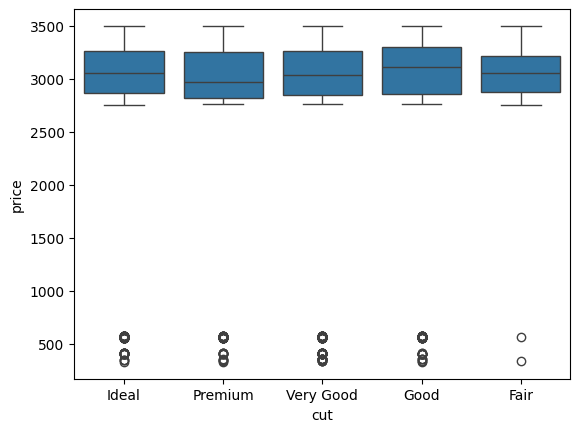

<Axes: xlabel='carat', ylabel='price'>

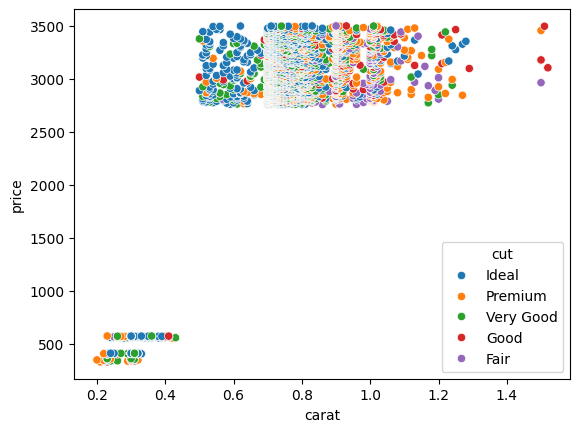

In [147]:
import pandas as pd
import seaborn as sns

diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.iloc[:-50000]
print(diamonds.head(3))
print(diamonds.shape)

diamonds.dtypes

diamonds.isna().sum()
#non ci sono na() ma per rimouvere is fa cosi

diamonds.dropna(subset=['carat', 'price'], inplace=True)


a = diamonds.groupby('cut')['price'].mean()
a

diamonds['price_per_carat'] = diamonds['price'] / diamonds['carat']


print(diamonds.head(3))

sns.boxplot(diamonds, x='cut', y='price')
plt.show()


sns.scatterplot(diamonds,x='carat', y='price', hue='cut')


## Esercizio 6 - Curve fitting
Genera dati con una relazione quadratica:
x = np.linspace(-5, 5, 50)
y = 2*x**2 - 3*x + 1 + np.random.normal(0, 4, 50)

Definisci la funzione quadratica per il fitting

Esegui il curve fitting usando scipy.optimize.curve_fit

Stampa i parametri ottimali con i relativi errori

Calcola l'errore quadratico medio (MSE) tra dati originali e modello e MAE

Crea un grafico che mostra:

Dati originali (scatter)

Curva fittata

Curva teorica originale (senza rumore)

14.278171294317053 2.960205085698028
[ 1.9414584  -3.03584953  2.01718324] [[ 5.05383111e-03  8.36099766e-11 -4.38342481e-02]
 [ 8.36099766e-11  3.50253015e-02 -1.11814257e-09]
 [-4.38342481e-02 -1.11814257e-09  6.83985862e-01]]


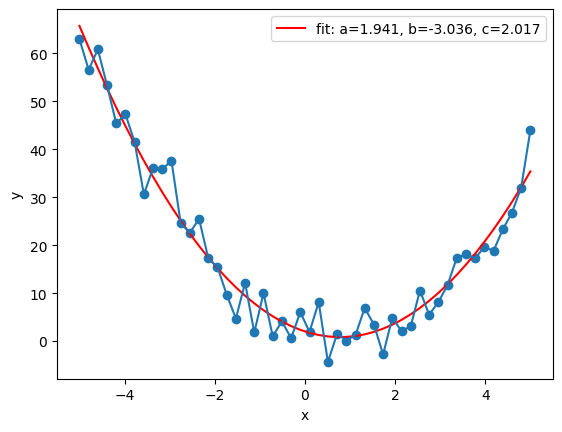

In [161]:
from scipy.optimize import curve_fit

x = np.linspace(-5, 5, 50)
y = 2*x**2 - 3*x + 1 + np.random.normal(0, 4, 50)

def func(x,a,b,c):
    return a* (x*x) + b * x + c

def normal(x,y):
    popt, pcov = curve_fit(func, x, y)
    return popt, pcov


a,b = normal(x,y)
pred = func(x, a[0], a[1], a[2])

mse = np.mean((y - pred) ** 2)
mae = np.mean(np.abs(y - pred))

print(mse, mae)
print(a,b)
plt.plot(x, func(x, a[0], a[1], a[2]), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(a))
plt.plot(x,y)
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


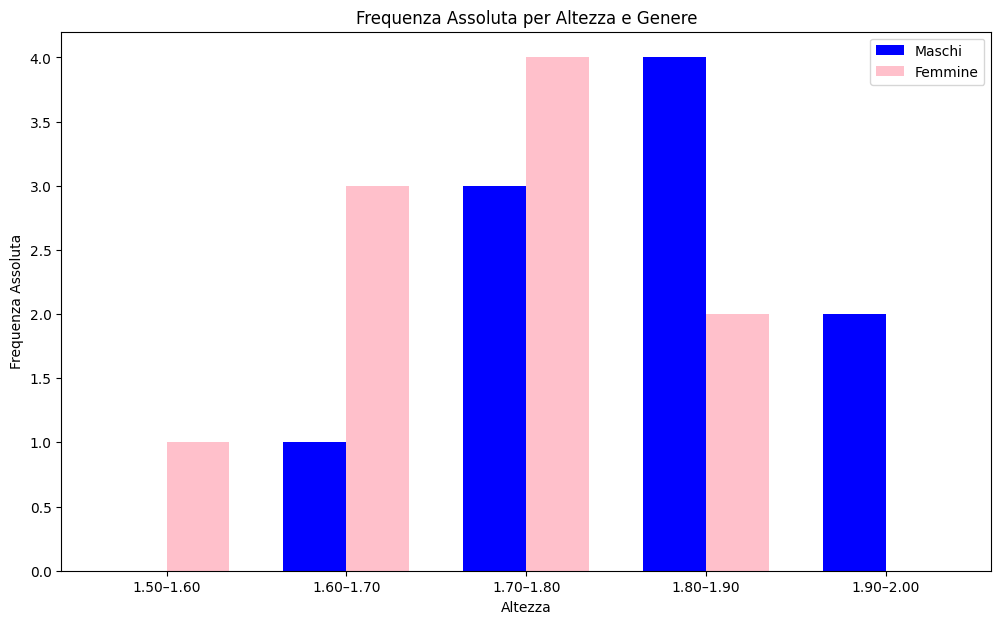

In [ ]:
import numpy as np

# Dati estratti dalle tabelle fornite
altezze = ['1.50–1.60', '1.60–1.70', '1.70–1.80', '1.80–1.90', '1.90–2.00']
freq_assoluta_m = np.array([0, 1, 3, 4, 2])  # Frequenza assoluta maschile
freq_assoluta_f = np.array([1, 3, 4, 2, 0])  # Frequenza assoluta femminile

# Larghezza delle barre
bar_width = 0.35

# Creazione del diagramma a barre sovrapposte
fig, ax = plt.subplots(figsize=(12, 7))

# Impostiamo le posizioni delle barre per maschi e femmine
posizioni_m = np.arange(5)  # Posizioni per maschi
posizioni_f = posizioni_m + bar_width  # Posizioni per femmine con uno spostamento

# Creiamo le barre per maschi e femmine
barre_m = ax.bar(posizioni_m, freq_assoluta_m, bar_width, label='Maschi', color='blue')
barre_f = ax.bar(posizioni_f, freq_assoluta_f, bar_width, label='Femmine', color='pink')

# Aggiungiamo titolo e etichette agli assi
ax.set_title('Frequenza Assoluta per Altezza e Genere')
ax.set_xlabel('Altezza')
ax.set_ylabel('Frequenza Assoluta')

# Definiamo le etichette per l'asse delle x
ax.set_xticks(posizioni_m + bar_width / 2)
ax.set_xticklabels(altezze)

# Aggiungiamo la legenda
ax.legend()

sns.barplot()

